In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [10]:
solar_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/7e342d3b6dc19a057cc4dc535a8ce591/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/solarpower.zip')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [6]:
solar_data['cum_power'].value_counts()

 24053.0    3
-1.0        2
 24048.0    2
 24081.0    2
 20208.0    2
           ..
 23080.0    1
 23083.0    1
 23103.0    1
 23108.0    1
 28120.0    1
Name: cum_power, Length: 650, dtype: int64

In [12]:
round(solar_data['cum_power'].mean())

23776

In [16]:

fill_data = solar_data.copy()
for i, v in enumerate(fill_data['cum_power']):
    if v == -1:
        fill_data['cum_power'][i] = (fill_data['cum_power'][i+1] + fill_data['cum_power'][i-1])/2


C:\Users\insps\AppData\Local\Temp\ipykernel_13428\3989443223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_data['cum_power'][i] = (fill_data['cum_power'][i+1] + fill_data['cum_power'][i-1])/2


In [14]:
round(fill_data['cum_power'].mean())

23848

In [32]:
day_data = fill_data.copy()
day_data.date = pd.to_datetime(day_data.date)
day_data.sort_values(by='date')

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [36]:
day_data['day_power']=day_data.cum_power.diff()

In [37]:
day_data

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0
...,...,...,...
659,2018-10-22,28101.0,6.0
660,2018-10-23,28109.0,8.0
661,2018-10-24,28115.0,6.0
662,2018-10-25,28117.0,2.0


In [43]:

month_data = day_data.groupby(day_data.date.dt.to_period('M')).day_power.mean()
round(month_data['2017-03'])

11

In [47]:
month_data

date
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

<AxesSubplot: xlabel='date'>

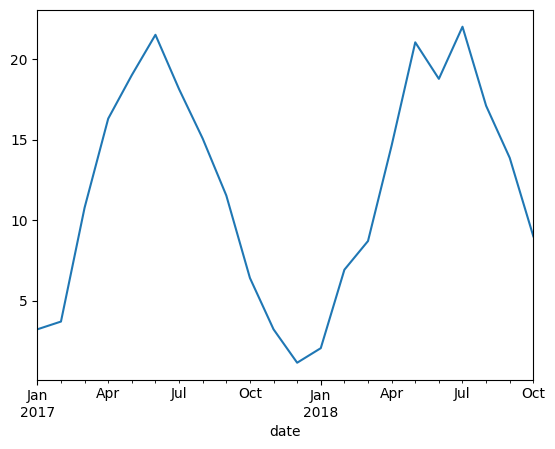

In [49]:
month_data.plot.line()